In [14]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore

In [3]:
data = np.load('resampled.npy')

In [4]:
# data = np.load('resampled_filtered.npy')
# Cut away nans at beginning and end:
# data = filtered[:, 301:-302]

In [5]:
from picard import picard

In [6]:
def mixing(W, K):
    w = np.dot(W, K)
    return np.dot(w.T, np.linalg.inv(np.dot(w, w.T)))

In [7]:
n_components = 15

In [8]:
K, W, Y = picard(data, n_components=n_components)

In [9]:
M = mixing(W, K)

In [10]:
mm = np.max([np.abs(M.max()), np.abs(M.min())])

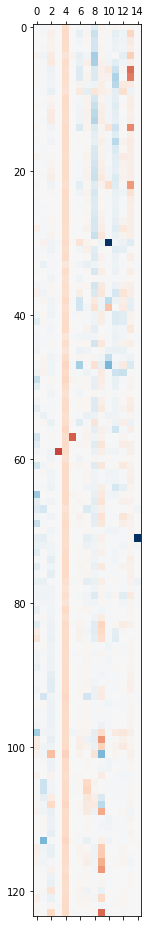

In [11]:
plt.matshow(M, cmap='RdBu', vmax=mm, vmin=-mm)

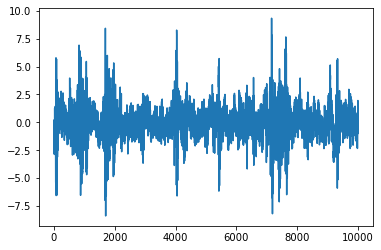

In [12]:
plt.plot(Y[1, :10000])

In [ ]:
Y = KWX

In [104]:
def plot_tseries(data, ic, t0, delta_t=1000):
    zdata1 = zscore(data)
    zdata2 = zscore(data-ic)
    fig, ax = plt.subplots(1, 2)
    factor = 4
    for chan in range(zdata1.shape[0]):
        ax[0].plot(zdata1[chan, t0:t0+delta_t] + chan*factor)
        ax[1].plot(zdata2[chan, t0:t0+delta_t] + chan*factor)
        ax[0].text(-100, chan*factor, '%s'%chan)
    ax[0].set_yticks([])
    ax[1].set_yticks([])
    fig.set_size_inches([12, 16])
    return fig

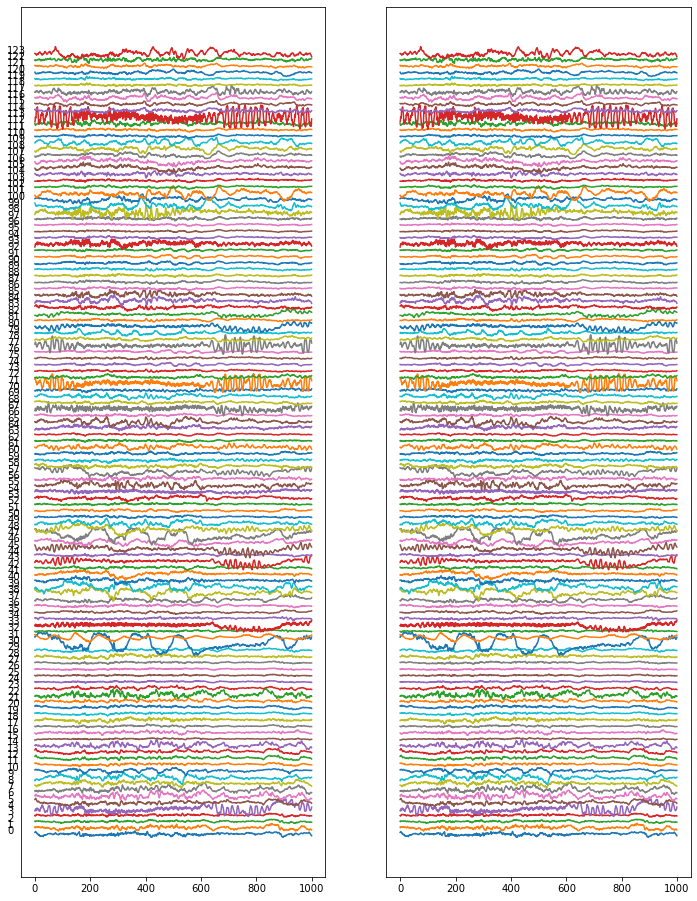

In [105]:
_ = plot_tseries(data, Y[4], 1000)

In [106]:
Y[4]

array([-10.08656566, -18.82301174, -16.48585511, ...,   1.55483159,
         0.17570695,   2.63412221])

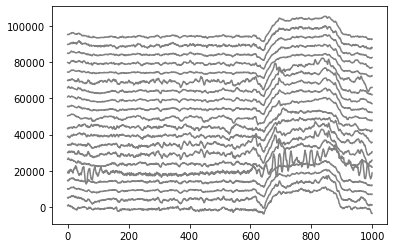

In [13]:
_ = plt.plot((data[:20, 1000:2000] + np.arange(0, 20 * 5000, 5000)[:, None]).T, color='gray')

In [ ]:
_ = plt.plot((data[:20, 1000:2000] + np.arange(0, 20 * 5000, 5000)[:, None]).T, color='gray')